In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

import src.read_weather as rw
from src.graphing_functions import get_average_per_state, get_julian_day_column

import julian
import datetime


In [4]:
txt_path = 'data/weather/meta_data/ghcnd-stations.txt'
path_2000= 'data/weather/gz_files/2000.csv.gz'

In [5]:
weather_data=rw.read_weather_data(path_2000)
meta_data= rw.read_metadata_txt(txt_path)

In [8]:
meta_data.head()

,station_id,latitude,longitude,elevation,state
0,ACW00011604,17.1167,-61.7833,10.1,ST
1,ACW00011647,17.1333,-61.7833,19.2,ST
2,AE000041196,25.3330,55.5170,34.0,SHARJAH
3,AEM00041194,25.2550,55.3640,10.4,DUBAI
4,AEM00041217,24.4330,54.6510,26.8,ABU


In [9]:
weather_data.head()

,station_id,measurement_date,measurement_type,measurement_flag
0,ASN00015643,2000-01-01,TMAX,350
1,ASN00015643,2000-01-01,PRCP,0
2,ASN00085296,2000-01-01,TMAX,141
3,ASN00085296,2000-01-01,TMIN,79
4,ASN00085296,2000-01-01,PRCP,10


In [6]:
states=['AK','TX','WA','FL']

Processing: AK
There are 221 stations in the state of AK
Processing: TX
There are 694 stations in the state of TX
Processing: WA
There are 226 stations in the state of WA
Processing: FL
There are 143 stations in the state of FL


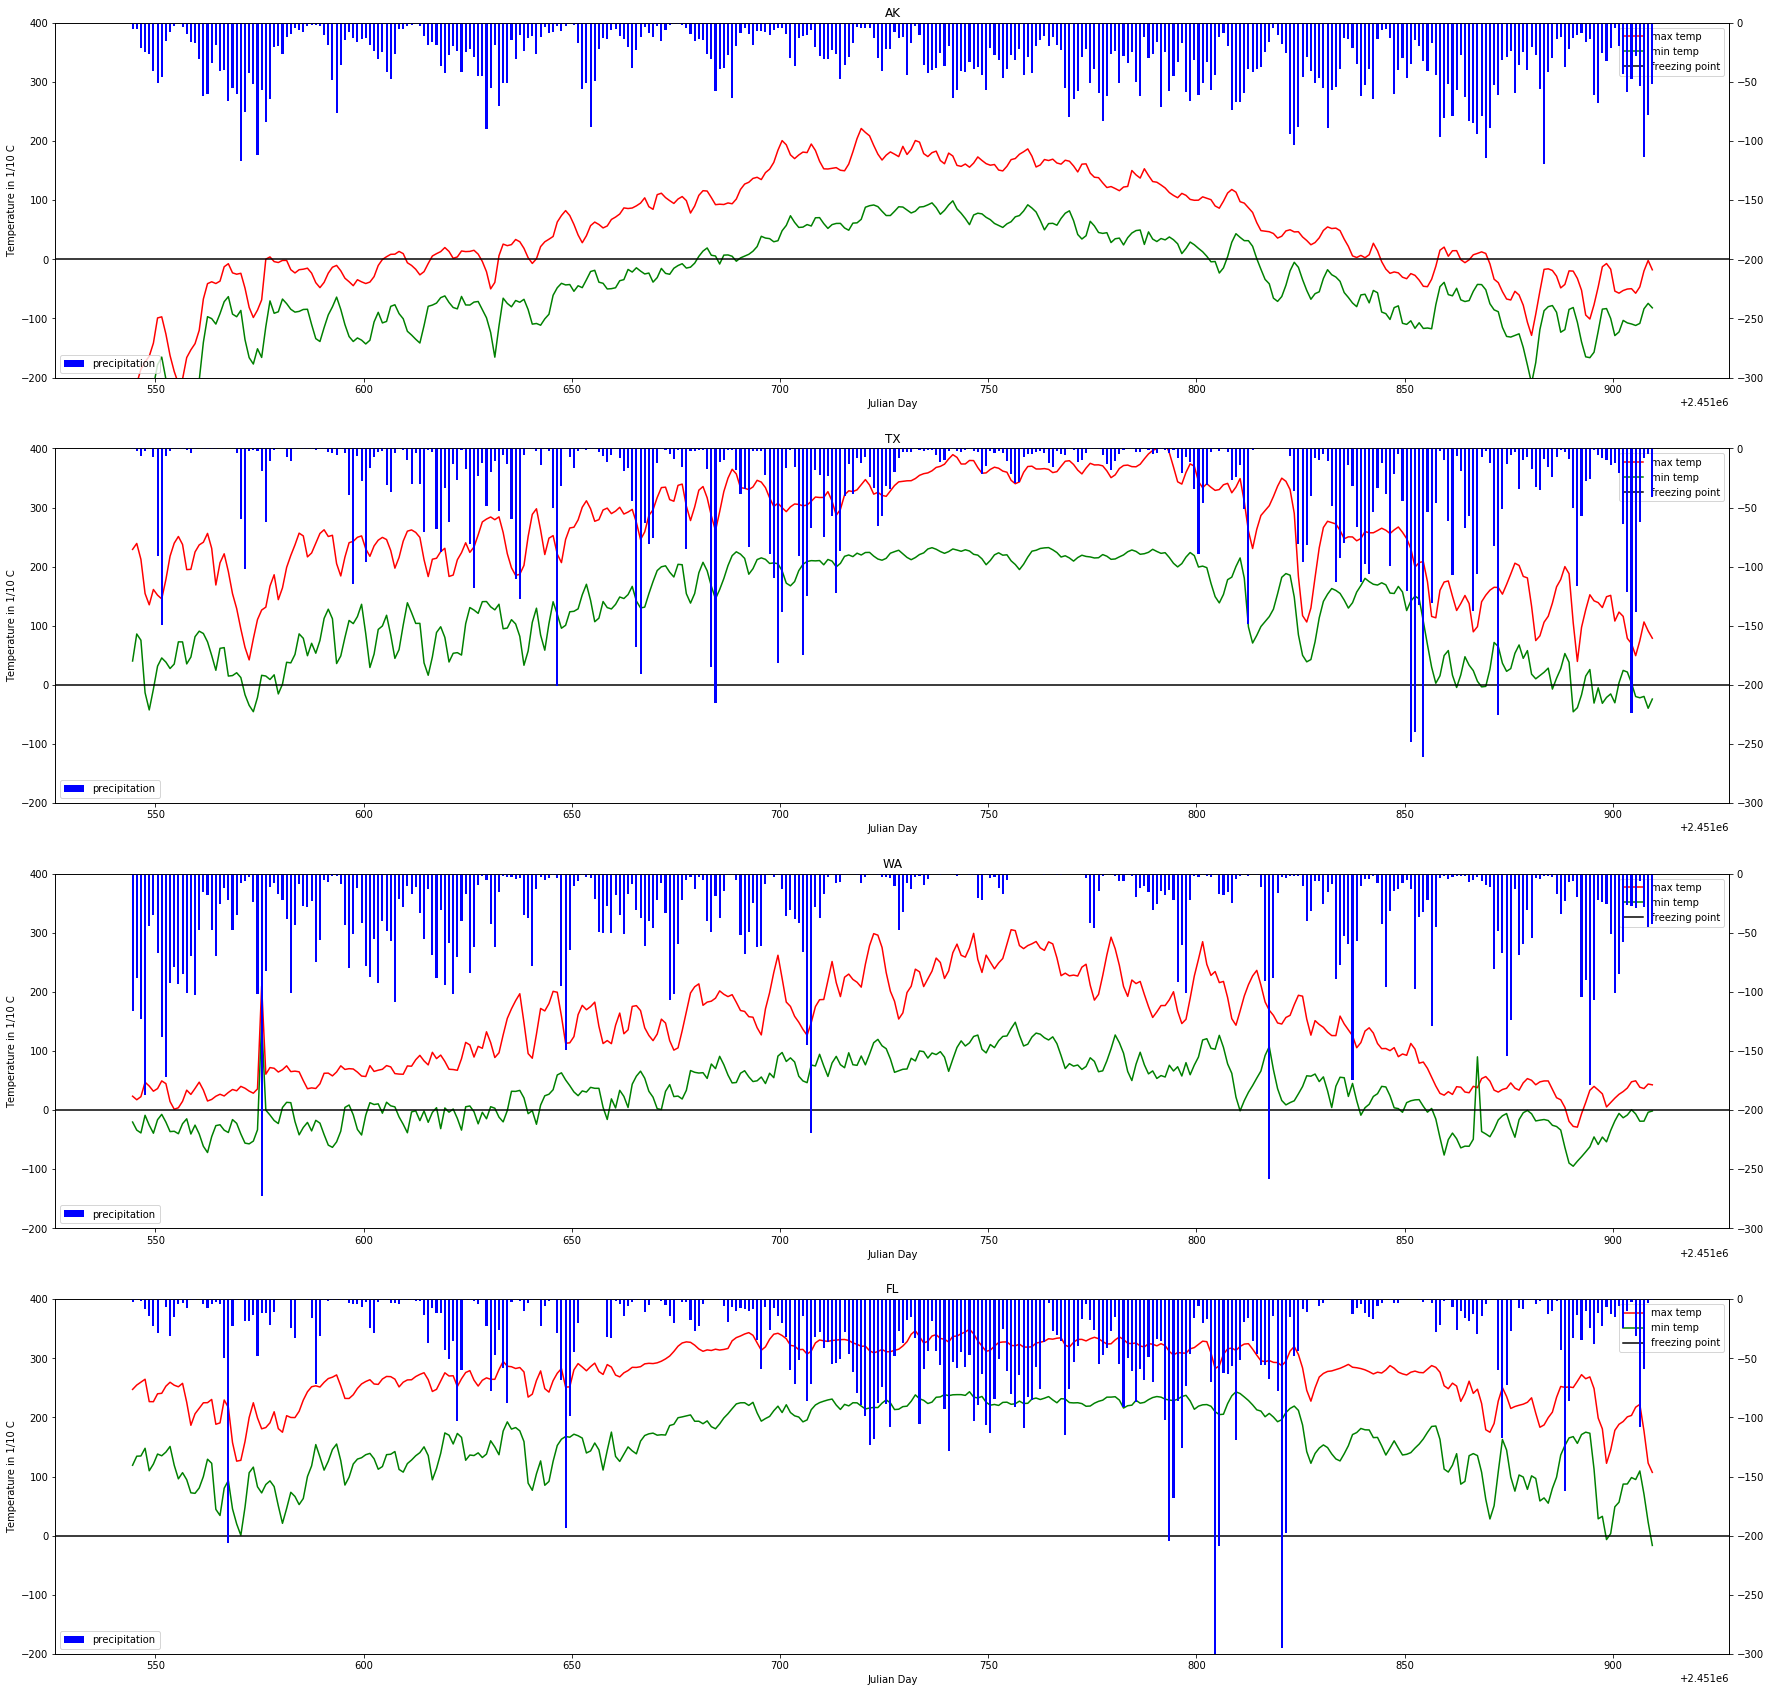

In [7]:
fig, axs = plt.subplots(4,1,figsize=(30,30))
for ax, state in zip(axs.flatten(),states):
    print(f'Processing: {state}')
    graph_4_real=get_average_per_state(meta_data,weather_data, state)
    julian_days = graph_4_real['julian'].values
    precip = graph_4_real['PRCP'].values
    max_t= graph_4_real['TMAX']
    min_t=graph_4_real['TMIN']
    
    #ax.plot(julian_days, precip, label='precipitation')
    ax.plot(julian_days, max_t,label='max temp', color='red')
    ax.plot(julian_days, min_t, label='min temp', color='green')
    ax.axhline(y=0, label='freezing point',color='black')
    ax2 = ax.twinx()
    ax2.bar(julian_days, -precip, 0.5,label='precipitation',color='blue')
    
    ax.set_ylim(-200,400)
    ax2.set_ylim(-300,0)
    
    ax.set_title(state)
    ax.set_ylabel('Temperature in 1/10 C')
    ax.set_xlabel('Julian Day')
    ax.legend()
    ax2.legend()